In [1]:
import torch
import torchvision 
import torch.nn as nn #Base class for all neural network modules.
import torch.nn.functional as F #Applies a 1D convolution over an input signal composed of several input planes.
from torchvision import datasets 
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable #Computes and returns the sum of gradients of outputs w.r.t. the inputs.
print(torch.__version__)

1.0.0


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import cython 
import tkinter
import xml

In [3]:
def to_var(x):
    """
    If the GPU is available, use it!
    """
    if torch.cuda.is_available():
        x=x.cuda()
    return Variable(x)

def denorm(x):
    """
    Clamps the values into a given range from 0 to 1
    """
    out = (x+1)/2
    return out.clamp(0,1)

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

# REading MNist Dataset
# It will automatically download the dataset
r ="J:\\COURSES\\Udemy"
mnist = datasets.MNIST(root=r, 
                      transform = transform,
                      download = True)

# Used for loading the processed images 
data_loader = torch.utils.data.DataLoader(dataset=mnist,
                                          batch_size=100, 
                                          shuffle=True)

In [5]:
# Defining descriminator()
D = nn.Sequential(
    nn.Linear(784, 256), # 784 is the linearized size of the frame
    nn.LeakyReLU(0.2),
    nn.Linear(256, 256),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 1),
    nn.Sigmoid())

# Defining Generator()
G = nn.Sequential(
    nn.Linear(64, 256),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 256),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 784),
    nn.Tanh())

if torch.cuda.is_available():
    D.cuda()
    G.cuda()

In [ ]:
data_loader.dataset.train_data
plt.imshow(data_loader.dataset.train_data[30,:,:].numpy())


In [7]:
# Using Adam as our optimizing strategy
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0003)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0003)



In [ ]:
for epoch in range(200):
    for i, (images, _) in enumerate(data_loader):
        # Build mini-batch dataset
        batch_size = images.size(0)
        images = to_var(images.view(batch_size, -1))
        
        # Create the labels which are later used as input for the BCE loss
        real_labels = to_var(torch.ones(batch_size)) #return a scalar of value 1
        fake_labels = to_var(torch.zeros(batch_size)) #Returns a tensor filled with the scalar value 0

        #============= Train the discriminator =============#
        # Compute BCE_Loss using real images where BCE_Loss(x, y): - y * log(D(x)) - (1-y) * log(1 - D(x))
        # Second term of the loss is always zero since real_labels == 1
        outputs = D(images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs
        
        # Compute BCELoss using fake images
        # First term of the loss is always zero since fake_labels == 0
        z = to_var(torch.randn(batch_size, 64))
        fake_images = G(z)
        outputs = D(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs
        
        # Backprop + Optimize
        d_loss = d_loss_real + d_loss_fake
        D.zero_grad()
        d_loss.backward()
        d_optimizer.step()
        
        #=============== Train the generator ===============#
        # Compute loss with fake images
        z = to_var(torch.randn(batch_size, 64))
        fake_images = G(z)
        outputs = D(fake_images)
        
        # We train G to maximize log(D(G(z)) instead of minimizing log(1-D(G(z)))
        g_loss = criterion(outputs, real_labels)
        
        # Backprop + Optimize
        D.zero_grad()
        G.zero_grad()
        g_loss.backward()
        g_optimizer.step()
        
        #if (i+1) % 300 == 0:
        #    print('Epoch [%d/%d], Step[%d/%d], d_loss: %.4f, '
        #          'g_loss: %.4f, D(x): %.2f, D(G(z)): %.2f' 
        #          %(epoch, 200, i+1, 600, d_loss.data[0], g_loss.data[0],
        #            real_score.data.mean(), fake_score.data.mean()))
    
    # Save real images
    if (epoch+1) == 1:
        images = images.view(images.size(0), 1, 28, 28)
        save_image(denorm(images.data), 'J:\\COURSES\\Udemy\\real_images.png')
    
    # Save sampled images
    fake_images = fake_images.view(fake_images.size(0), 1, 28, 28)
    save_image(denorm(fake_images.data), 'J:\\COURSES\\Udemy\\fake_images-%d.png' %(epoch+1))

# Save the trained parameters 
torch.save(G.state_dict(), 'J:\\COURSES\\Udemy\\generator.pkl')
torch.save(D.state_dict(), 'J:\\COURSES\\Udemy\\discriminator.pkl')

C:\Users\Tommy\Anaconda3\envs\pytorch_env\lib\site-packages\torch\nn\functional.py:2016: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


In [54]:
d_loss.data[0]



IndexError: invalid index of a 0-dim tensor. Use tensor.item() to convert a 0-dim tensor to a Python number

TypeError: Invalid dimensions for image data

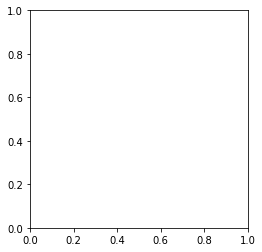

In [44]:
plt.imshow(images[0,:,:].numpy())